### TYPE YOUR NAME HERE:

# ISM 5136 - Data Analytics and Mining for Business

## Lab Session: Data Wrangling with Pandas

### Overview:
This lab covers operations related to reading and manipulating data with Pandas.

### Task:
The code cells in this notebook have been left blank. Your task is to complete these cells and provide the execution results. The corresponding question text for each code cell is provided above the cell. Once you have completed the lab, you should publish your notebook code (the code in the .ipynb file) as a "Secret Gist" on your GitHub repository and obtain the Gist ID.

### Submission Format:
There are two deliverables of this lab: 1) the Gist ID and 2) the completed .ipynb file. Both of these should be submitted on Canvas using the corresponding lab submission link by the due date indicated on Canvas.

### Important: Do <u>not</u> forget to run the cells before submitting your work.


### Data Description:

There are two datasets for this lab. The 1st dataset (census2000_v2.txt) provides geographic, demographics, and economic information about the locations in the U.S. based on the Census conducted in 2000. Each object corresponds to one zip code within the U.S. The 2nd dataset (US_areaNames.txt) provides a list of zip codes within the U.S., along with the city, county, and state names.

### Questions: Please note that there are multiple steps in each question. You can run each step individually (before moving on to the next one) to make sure that your results are correct.

#### 1. Data Import
* Import the census2000_v2.txt data into a DataFrame named df1.
* Display the column names.
* Display the size (how many rows and columns).
* Display the first 10 rows.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_table('census2000_v2.txt')
for col in df1.columns:
    print(col)

RegionID
Longitude
Latitude
RegionDensityPercentile
RegionPopulation
MedianHouseholdIncome
AverageHouseholdSize


In [3]:
df1.info

<bound method DataFrame.info of       RegionID  Longitude   Latitude  RegionDensityPercentile  \
0          601  -66.74947  18.180103                     70.0   
1          602  -67.18025  18.363285                     83.0   
2          603  -67.13422  18.448619                     86.0   
3          604  -67.13700  18.498987                     83.0   
4          606  -66.95881  18.182151                     65.0   
...        ...        ...        ...                      ...   
33185     1012  -72.84356  42.390836                     34.0   
33186     1013  -72.60317  42.161492                     93.0   
33187     1020  -72.57266  42.175992                     88.0   
33188     1022  -72.55606  42.196666                     75.0   
33189     1026  -72.91813  42.465041                     41.0   

       RegionPopulation  MedianHouseholdIncome  AverageHouseholdSize  
0                 19143                 9888.0                  3.24  
1                 42042                11384.

In [4]:
df1.head(10)


,RegionID,Longitude,Latitude,RegionDensityPercentile,RegionPopulation,MedianHouseholdIncome,AverageHouseholdSize
0,601,-66.74947,18.180103,70.0,19143,9888.0,3.24
1,602,-67.18025,18.363285,83.0,42042,11384.0,3.10
2,603,-67.13422,18.448619,86.0,55592,10748.0,2.84
3,604,-67.13700,18.498987,83.0,3844,31199.0,3.00
4,606,-66.95881,18.182151,65.0,6449,9243.0,3.20
5,610,-67.13605,18.288319,79.0,28005,12629.0,3.01
6,612,-66.69880,18.449732,81.0,72865,13000.0,2.84
7,616,-66.67669,18.426748,78.0,10525,10476.0,2.97
8,617,-66.55576,18.455499,81.0,23223,11511.0,2.97
9,622,-67.16746,18.003125,69.0,8284,13634.0,2.64


#### 2. Data Checking
* Obtain the data types of columns in df1.
* Display summary statistics for all variables.
* Write down the problems you identify in the data (use comments to write them down in the code cell below).
* Double check the existence of missing values using a method.

##### Hints:
1. <span style="color: black; background: black; span:hover { color: white}">Possible attributes and methods to use: dtypes, describe(include='all'), isnull().sum()</span>
2. <span style="color: black; background: black; span:hover { color: white}">Problems that you should have noticed: 1) duplicates in regionID, 2) regionID is non-numeric, 3) missing values </span>

In [5]:
df1.dtypes

RegionID                    object
Longitude                  float64
Latitude                   float64
RegionDensityPercentile    float64
RegionPopulation             int64
MedianHouseholdIncome      float64
AverageHouseholdSize       float64
dtype: object

In [6]:
df1.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)
##There are some instances of missing values in regiondensitypercentile, which we can either choose to ignore
# and delete entirely or set equal to the median value so as not to skew too much 
## some values are duplicates, not sure if they are supposed to be or not
##Region ID I think needs to be and integer and not an object 

,Longitude,Latitude,RegionDensityPercentile,RegionPopulation,MedianHouseholdIncome,AverageHouseholdSize
count,33190.000000,33190.000000,32177.000000,33190.000000,33173.000000,33190.000000
mean,-91.077664,38.831628,50.504149,8597.913980,38251.266783,2.500703
std,15.072058,5.358824,28.863921,12978.511224,17469.495624,0.595654
min,-176.636760,17.962234,1.000000,0.000000,0.000000,0.000000
25%,-97.218277,35.384861,26.000000,656.000000,28906.000000,2.360000
50%,-88.304135,39.462072,51.000000,2515.000000,35765.000000,2.550000
75%,-80.372860,42.109246,76.000000,11171.750000,45240.000000,2.740000
max,-65.292580,71.299525,100.000000,144024.000000,200001.000000,8.490000


In [7]:
df1.isnull().sum()
##There are 1030 missing values in the averagehouseholdsize column 

RegionID                      0
Longitude                     0
Latitude                      0
RegionDensityPercentile    1013
RegionPopulation              0
MedianHouseholdIncome        17
AverageHouseholdSize          0
dtype: int64

#### 3. Data Cleaning
* Remove observations with duplicated RegionID (keep one, remove rest).
* Remove observations with non-numeric RegionID values (RegionID is the zip code, which should have been numeric. A non-numeric value indicates a problem with the entry).
* Handle missing values in two different ways:
<ol>
<li>Remove observations with missing values in RegionDensityPercentile.</li>
<li>Impute missing values in the MedianHouseholdIncome columns with the average of MedianHouseholdIncome.</li>
</ol>
* After the steps above have been completed, display the summary statistics one more time.

##### Hints:
1. <span style="color: black; background: black; span:hover { color: white}">Possible methods to use: drop_duplicates(), isnumeric(), dropna(), fillna(), mean()</span>
2. <span style="color: black; background: black; span:hover { color: white}">You can use "inplace=True" parameter inside most method inputs to overwrite the existing dataframe</span>
3. <span style="color: black; background: black; span:hover { color: white}">One way of imputing missing values: df1['MedianHouseholdIncome'].fillna(df1['MedianHouseholdIncome'].mean(),inplace=True) </span>


In [8]:
df1.drop_duplicates(subset='RegionID', keep="last")

,RegionID,Longitude,Latitude,RegionDensityPercentile,RegionPopulation,MedianHouseholdIncome,AverageHouseholdSize
0,601,-66.74947,18.180103,70.0,19143,9888.0,3.24
1,602,-67.18025,18.363285,83.0,42042,11384.0,3.10
2,603,-67.13422,18.448619,86.0,55592,10748.0,2.84
3,604,-67.13700,18.498987,83.0,3844,31199.0,3.00
4,606,-66.95881,18.182151,65.0,6449,9243.0,3.20
...,...,...,...,...,...,...,...
33185,1012,-72.84356,42.390836,34.0,521,50938.0,2.73
33186,1013,-72.60317,42.161492,93.0,22963,32412.0,2.34
33187,1020,-72.57266,42.175992,88.0,29325,37282.0,2.33
33188,1022,-72.55606,42.196666,75.0,2365,41083.0,1.98


In [9]:

df1['RegionID'] = (
    pd.to_numeric(df1['RegionID'],
                  errors='coerce')
      .fillna(0)
    )

df1

,RegionID,Longitude,Latitude,RegionDensityPercentile,RegionPopulation,MedianHouseholdIncome,AverageHouseholdSize
0,601.0,-66.74947,18.180103,70.0,19143,9888.0,3.24
1,602.0,-67.18025,18.363285,83.0,42042,11384.0,3.10
2,603.0,-67.13422,18.448619,86.0,55592,10748.0,2.84
3,604.0,-67.13700,18.498987,83.0,3844,31199.0,3.00
4,606.0,-66.95881,18.182151,65.0,6449,9243.0,3.20
...,...,...,...,...,...,...,...
33185,1012.0,-72.84356,42.390836,34.0,521,50938.0,2.73
33186,1013.0,-72.60317,42.161492,93.0,22963,32412.0,2.34
33187,1020.0,-72.57266,42.175992,88.0,29325,37282.0,2.33
33188,1022.0,-72.55606,42.196666,75.0,2365,41083.0,1.98


In [10]:
df1 = df1.dropna(subset=['RegionDensityPercentile'])


df1['MedianHouseholdIncome'].fillna(df1['MedianHouseholdIncome'].mean(),inplace=True)
df1

C:\Users\14076\AppData\Local\Temp\ipykernel_9400\4056607780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['MedianHouseholdIncome'].fillna(df1['MedianHouseholdIncome'].mean(),inplace=True)


,RegionID,Longitude,Latitude,RegionDensityPercentile,RegionPopulation,MedianHouseholdIncome,AverageHouseholdSize
0,601.0,-66.74947,18.180103,70.0,19143,9888.0,3.24
1,602.0,-67.18025,18.363285,83.0,42042,11384.0,3.10
2,603.0,-67.13422,18.448619,86.0,55592,10748.0,2.84
3,604.0,-67.13700,18.498987,83.0,3844,31199.0,3.00
4,606.0,-66.95881,18.182151,65.0,6449,9243.0,3.20
...,...,...,...,...,...,...,...
33185,1012.0,-72.84356,42.390836,34.0,521,50938.0,2.73
33186,1013.0,-72.60317,42.161492,93.0,22963,32412.0,2.34
33187,1020.0,-72.57266,42.175992,88.0,29325,37282.0,2.33
33188,1022.0,-72.55606,42.196666,75.0,2365,41083.0,1.98


In [11]:
df1.dtypes

RegionID                   float64
Longitude                  float64
Latitude                   float64
RegionDensityPercentile    float64
RegionPopulation             int64
MedianHouseholdIncome      float64
AverageHouseholdSize       float64
dtype: object

In [12]:
df1.describe()


,RegionID,Longitude,Latitude,RegionDensityPercentile,RegionPopulation,MedianHouseholdIncome,AverageHouseholdSize
count,32177.000000,32177.000000,32177.000000,32177.000000,32177.000000,32177.000000,32177.000000
mean,49453.206296,-91.096399,38.848289,50.504149,8868.594493,39456.134111,2.579430
std,27549.043874,15.063718,5.357678,28.863921,13089.850674,16343.634293,0.403604
min,0.000000,-176.636760,17.964529,1.000000,1.000000,0.000000,0.000000
25%,26591.000000,-97.222350,35.400170,26.000000,755.000000,29643.000000,2.380000
50%,49740.000000,-88.342670,39.475565,51.000000,2721.000000,36161.000000,2.560000
75%,71835.000000,-80.407150,42.117527,76.000000,11718.000000,45641.000000,2.750000
max,99950.000000,-65.292580,71.299525,100.000000,144024.000000,200001.000000,8.490000


#### 4. 2nd Dataset Import
* Try importing the US_areaNames.txt data into a DataFrame named df2. You should notice a problem.
* The issue is that the column names are missing from this dataset. Below are the names and short descriptions of columns obtained from the source repository.
* Re-import the data using column names given below.
* Display the column names.
* Display the size (how many rows and columns).
* Obtain summary statistics
* Display the first 10 rows.

##### Hints:
1. <span style="color: black; background: black; span:hover { color: white}">To import data with column names, first create a list of column names and then use the "names" parameter within the read method and point it to the list.</span>


##### Data Description:
country code      : iso country code, 2 characters <br>
postal code       : varchar(20) <br>
place name        : varchar(180) <br>
admin name1       : 1. order subdivision (state) varchar(100) <br>
admin code1       : 1. order subdivision (state) varchar(20) <br>
admin name2       : 2. order subdivision (county/province) varchar(100) <br>
admin code2       : 2. order subdivision (county/province) varchar(20) <br>
admin name3       : 3. order subdivision (community) varchar(100) <br>
admin code3       : 3. order subdivision (community) varchar(20) <br>
latitude          : estimated latitude (wgs84) <br>
longitude         : estimated longitude (wgs84) <br>
accuracy          : accuracy of lat/lng from 1=estimated to 6=centroid

In [13]:
df3 = pd.read_table('US_areaNames.txt',
                 names=['country code','postal code','place name','admin name1','admin code1','admin name2','admin code2','admin name3','admin code3','latitude','longitude','accuracy'],
                 skiprows=1)
df3

,country code,postal code,place name,admin name1,admin code1,admin name2,admin code2,admin name3,admin code3,latitude,longitude,accuracy
0,US,34034,APO,NaN,AA,Dillon,33.0,NaN,NaN,33.0364,-82.2493,NaN
1,US,99553,Akutan,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.1430,-165.7854,NaN
2,US,99571,Cold Bay,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.3976,-162.4206,NaN
3,US,99583,False Pass,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.8410,-163.4368,NaN
4,US,99612,King Cove,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.0628,-162.3056,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
43622,US,82442,Ten Sleep,Wyoming,WY,Washakie,43.0,NaN,NaN,43.9978,-107.4153,NaN
43623,US,82701,Newcastle,Wyoming,WY,Weston,45.0,NaN,NaN,43.8511,-104.2262,NaN
43624,US,82715,Four Corners,Wyoming,WY,Weston,45.0,NaN,NaN,43.8400,-104.5681,NaN
43625,US,82723,Osage,Wyoming,WY,Weston,45.0,NaN,NaN,43.9990,-104.4226,NaN


#### 5. 2nd Dataset Cleaning
* We only need the zip code, city, and state abbreviation from the 2nd dataset. Therefore, subset these 3 columns into a new dataset called df3.
* Rename "place name" to "city" and "admin code1" to "state" in df3. 
* After these steps, display the column names in df3.

In [14]:
df4 = df3[['postal code','place name','admin code1']].copy()
df4

,postal code,place name,admin code1
0,34034,APO,AA
1,99553,Akutan,AK
2,99571,Cold Bay,AK
3,99583,False Pass,AK
4,99612,King Cove,AK
...,...,...,...
43622,82442,Ten Sleep,WY
43623,82701,Newcastle,WY
43624,82715,Four Corners,WY
43625,82723,Osage,WY


In [15]:
df4 = df4.rename(columns={'place name': 'city', 'admin code1': 'state'})
df4

,postal code,city,state
0,34034,APO,AA
1,99553,Akutan,AK
2,99571,Cold Bay,AK
3,99583,False Pass,AK
4,99612,King Cove,AK
...,...,...,...
43622,82442,Ten Sleep,WY
43623,82701,Newcastle,WY
43624,82715,Four Corners,WY
43625,82723,Osage,WY


#### 6. Data Merging
* Try merging the census (df1) and location (df3) dataframes into a new dataframe called dfMerged. You can use the pandas' merge function for this purpose.
* You will encounter a data type related error when trying to merge. Explain this error using comments.
* Fix this error and complete the merging process.
* After the merging, obtain the summary statistics for dfMerged.

##### Hints:
1. <span style="color: black; background: black; span:hover { color: white}">You can look up pandas' merge documentation to understand more about the parameters used for merging datasets. An important thing to note is the merging should be based on the zip code value, however the zip code is called differently in the two datasets (RegionID in df1 and postal code in df3). Therefore, you need to use left_on and right_on parameters.</span>
2. <span style="color: black; background: black; span:hover { color: white}">The problem when trying to merge is that data types of zip code do not match -- one is numeric, the other one is string. To fix this, you can convert the RegionID in df1 to numeric using the to_numeric() function.</span>


In [16]:
df1[pd.to_numeric(df1['RegionID'], errors='ignore').notnull()]

,RegionID,Longitude,Latitude,RegionDensityPercentile,RegionPopulation,MedianHouseholdIncome,AverageHouseholdSize
0,601.0,-66.74947,18.180103,70.0,19143,9888.0,3.24
1,602.0,-67.18025,18.363285,83.0,42042,11384.0,3.10
2,603.0,-67.13422,18.448619,86.0,55592,10748.0,2.84
3,604.0,-67.13700,18.498987,83.0,3844,31199.0,3.00
4,606.0,-66.95881,18.182151,65.0,6449,9243.0,3.20
...,...,...,...,...,...,...,...
33185,1012.0,-72.84356,42.390836,34.0,521,50938.0,2.73
33186,1013.0,-72.60317,42.161492,93.0,22963,32412.0,2.34
33187,1020.0,-72.57266,42.175992,88.0,29325,37282.0,2.33
33188,1022.0,-72.55606,42.196666,75.0,2365,41083.0,1.98


In [17]:
df1.dtypes

RegionID                   float64
Longitude                  float64
Latitude                   float64
RegionDensityPercentile    float64
RegionPopulation             int64
MedianHouseholdIncome      float64
AverageHouseholdSize       float64
dtype: object

In [18]:
df4.dtypes

postal code     int64
city           object
state          object
dtype: object

In [19]:
merged = pd.merge(df1, df4, left_on='RegionID', right_on='postal code')

# You cannot merge an object and an integer

In [20]:
merged.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)

,RegionID,Longitude,Latitude,RegionDensityPercentile,RegionPopulation,MedianHouseholdIncome,AverageHouseholdSize,postal code
count,31852.000000,31852.000000,31852.000000,31852.000000,31852.000000,31852.000000,31852.000000,31852.000000
mean,49959.480158,-91.125279,38.931975,50.726799,8846.237254,39613.755597,2.579299,49959.480158
std,27215.816786,14.975656,5.201310,28.656719,12996.619947,16282.164880,0.396745,27215.816786
min,1001.000000,-176.636760,19.101978,1.000000,1.000000,0.000000,0.000000,1001.000000
25%,27590.500000,-97.186145,35.481506,26.000000,773.750000,29778.750000,2.380000,27590.500000
50%,50008.500000,-88.349440,39.510568,51.000000,2742.000000,36250.000000,2.560000,50008.500000
75%,72023.250000,-80.463008,42.127954,75.000000,11691.000000,45735.500000,2.740000,72023.250000
max,99950.000000,-67.003910,71.299525,100.000000,114301.000000,200001.000000,8.490000,99950.000000


#### 7. Preliminary Analysis (City Level)
* Let's assume that we'd like to investigate the census results for Tallahassee.
* Subset Tallahassee observations from the dfMerged data into a new dataframe called dfTally. To do this, you need to use "Tallahassee" as the city name, but not the zip codes (i.e., no hard coding of zip codes).
* Sort the dfTally dataset by MedianHouseholdIncome and write it over the sorted data into the dfTally dataframe. Which zip code has the highest median income in Tallahassee?

In [21]:
dfTally = merged[merged['city']== 'Tallahassee']
dfTally

,RegionID,Longitude,Latitude,RegionDensityPercentile,RegionPopulation,MedianHouseholdIncome,AverageHouseholdSize,postal code,city,state
9804,32301.0,-84.26904,30.431283,87.0,27316,29349.0,1.95,32301,Tallahassee,FL
9805,32303.0,-84.31528,30.486061,81.0,44634,37853.0,2.32,32303,Tallahassee,FL
9806,32304.0,-84.32394,30.446766,89.0,38549,14826.0,2.06,32304,Tallahassee,FL
9807,32308.0,-84.16049,30.531677,72.0,44753,55788.0,2.39,32308,Tallahassee,FL
9808,32310.0,-84.34803,30.400318,68.0,30183,27312.0,2.50,32310,Tallahassee,FL
9809,32311.0,-84.18842,30.403146,63.0,25929,51166.0,2.58,32311,Tallahassee,FL
9810,32312.0,-84.25980,30.554434,70.0,28478,73316.0,2.77,32312,Tallahassee,FL


In [22]:
dfTally =  (dfTally.nlargest(7, 'MedianHouseholdIncome'))
dfTally

#Zip Code 32312 has the highest median household income

,RegionID,Longitude,Latitude,RegionDensityPercentile,RegionPopulation,MedianHouseholdIncome,AverageHouseholdSize,postal code,city,state
9810,32312.0,-84.25980,30.554434,70.0,28478,73316.0,2.77,32312,Tallahassee,FL
9807,32308.0,-84.16049,30.531677,72.0,44753,55788.0,2.39,32308,Tallahassee,FL
9809,32311.0,-84.18842,30.403146,63.0,25929,51166.0,2.58,32311,Tallahassee,FL
9805,32303.0,-84.31528,30.486061,81.0,44634,37853.0,2.32,32303,Tallahassee,FL
9804,32301.0,-84.26904,30.431283,87.0,27316,29349.0,1.95,32301,Tallahassee,FL
9808,32310.0,-84.34803,30.400318,68.0,30183,27312.0,2.50,32310,Tallahassee,FL
9806,32304.0,-84.32394,30.446766,89.0,38549,14826.0,2.06,32304,Tallahassee,FL


#### 8. Preliminary Analysis (State Level)
Write statements that can answer the following questions:
* How many zip codes exist for each state?
* How many states are in the data?
* Group the zip codes at the state level and aggregate by column means. Compare the state averages of FL and CA for at least one attribute (e.g., MedianHouseholdIncome) 

##### Hints:
1. <span style="color: black; background: black; span:hover { color: white}">Some helpful methods / attributes are: value_counts(), nunique(), groupby(), mean(), loc</span>

In [23]:
counts = merged.groupby(["state"]).size().reset_index(name ='postal code')
print(counts)

# the below results show the number of zip codes in each state. All 50 states + Washington DC are included in the dataset

   state  postal code
0     AK          241
1     AL          623
2     AR          590
3     AZ          349
4     CA         1667
5     CO          479
6     CT          266
7     DC           25
8     DE           65
9     FL          928
10    GA          708
11    HI           87
12    IA          946
13    ID          272
14    IL         1344
15    IN          760
16    KS          690
17    KY          765
18    LA          514
19    MA          512
20    MD          452
21    ME          399
22    MI          962
23    MN          867
24    MO         1011
25    MS          426
26    MT          349
27    NC          784
28    ND          379
29    NE          577
30    NH          227
31    NJ          581
32    NM          344
33    NV          148
34    NY         1596
35    OH         1159
36    OK          655
37    OR          408
38    PA         1724
39    RI           70
40    SC          406
41    SD          379
42    TN          610
43    TX         1864
44    UT  

In [24]:
n_by_state = merged.groupby("state")["MedianHouseholdIncome"].mean()

# gc = merged.groupby(['state']).mean()

n_by_state

## CA has an average household income of 47154.736053
## FL has an average gousehold income of 40174.429957

state
AK    38192.966805
AL    32127.995185
AR    29035.662712
AZ    36637.733524
CA    47154.736053
CO    43078.043841
CT    61531.052632
DC    46412.920000
DE    52485.323077
FL    40174.429957
GA    37650.031073
HI    44220.000000
IA    38075.013742
ID    34047.941176
IL    43996.991815
IN    41947.096053
KS    37462.880099
KY    28961.135948
LA    30600.990272
MA    55663.371618
MD    55184.977876
ME    36356.604010
MI    42913.527027
MN    41393.139562
MO    34060.443126
MS    28073.889671
MT    31146.530086
NC    37049.510546
ND    32358.978892
NE    35921.279029
NH    49335.882239
NJ    62882.702238
NM    30309.851744
NV    44577.858108
NY    46643.830827
OH    40564.942192
OK    30516.767939
OR    37841.625000
PA    38842.083760
RI    49867.542857
SC    33980.039409
SD    31743.754617
TN    34959.976069
TX    37785.776824
UT    40980.507299
VA    41998.311086
VT    40475.850394
WA    41570.069519
WI    42570.522757
WV    26981.918145
WY    35922.215398
Name: MedianHouseholdInco

#### 9. Attribute Generation
* Use the Apply method.
* Create a new attribute called 'NorthEast' that shows whether the observation resides roughly in the NE part of U.S. or not (not the actual region). Values of the column should be either Yes or No. Let's assume that an observation is  in NE if:
    - its latitude is equal to or greater than 40.58 AND
    - its longitude is equal to or greater than -80.31
* Subset the observations that are in NE and list the unique states.


In [29]:
def label_ne (row):
    if row['Latitude'] >= 40.58 and row['Longitude'] >= -80.31:       
        return 'Yes'
    else:
        return 'No'
merged['NorthEast'] = merged.apply (lambda row: label_ne(row), axis=1)

merged

NEstates = 

,RegionID,Longitude,Latitude,RegionDensityPercentile,RegionPopulation,MedianHouseholdIncome,AverageHouseholdSize,postal code,city,state,NorthEast
0,1001.0,-72.62029,42.070610,83.0,16475,45735.0,2.25,1001,Agawam,MA,Yes
1,1001.0,-72.62029,42.070610,83.0,16475,45735.0,2.25,1001,Agawam,MA,Yes
2,1002.0,-72.50324,42.377651,77.0,36776,42567.0,2.46,1002,Amherst,MA,Yes
3,1002.0,-72.50324,42.377651,77.0,36776,42567.0,2.46,1002,Amherst,MA,Yes
4,1005.0,-72.10443,42.412094,59.0,5079,50395.0,2.69,1005,Barre,MA,Yes
...,...,...,...,...,...,...,...,...,...,...,...
31847,99925.0,-133.07317,55.555164,24.0,959,36328.0,2.74,99925,Klawock,AK,No
31848,99926.0,-131.56884,55.123897,16.0,1447,43516.0,2.95,99926,Metlakatla,AK,No
31849,99927.0,-133.60690,56.337957,15.0,136,17143.0,2.03,99927,Point Baker,AK,No
31850,99929.0,-132.33823,56.409507,5.0,2424,43696.0,2.49,99929,Wrangell,AK,No


In [32]:
NE = merged.drop_duplicates(['state'])
NE


,RegionID,Longitude,Latitude,RegionDensityPercentile,RegionPopulation,MedianHouseholdIncome,AverageHouseholdSize,postal code,city,state,NorthEast
0,1001.0,-72.62029,42.070610,83.0,16475,45735.0,2.25,1001,Agawam,MA,Yes
512,2804.0,-71.78102,41.430068,68.0,2829,54352.0,2.67,2804,Ashaway,RI,Yes
582,3031.0,-71.60820,42.854886,71.0,10776,88671.0,2.99,3031,Amherst,NH,Yes
809,3901.0,-70.84559,43.290160,64.0,6337,44519.0,2.73,3901,Berwick,ME,Yes
1208,5001.0,-72.36826,43.662892,67.0,9173,43125.0,2.32,5001,White River Junction,VT,Yes
1462,6001.0,-72.86431,41.789698,77.0,16110,90369.0,2.51,6001,Avon,CT,Yes
1591,6390.0,-72.00708,41.261936,49.0,269,50521.0,2.04,6390,Fishers Island,NY,Yes
1729,7001.0,-74.27988,40.578996,94.0,14263,55468.0,2.78,7001,Avenel,NJ,No
3905,15001.0,-80.28776,40.603966,76.0,34499,37130.0,2.43,15001,Aliquippa,PA,Yes
5629,19701.0,-75.69945,39.598203,82.0,31499,65020.0,2.79,19701,Bear,DE,No


In [34]:
NE.loc[:, ~(NE == 'Yes').any()]

,RegionID,Longitude,Latitude,RegionDensityPercentile,RegionPopulation,MedianHouseholdIncome,AverageHouseholdSize,postal code,city,state
0,1001.0,-72.62029,42.070610,83.0,16475,45735.0,2.25,1001,Agawam,MA
512,2804.0,-71.78102,41.430068,68.0,2829,54352.0,2.67,2804,Ashaway,RI
582,3031.0,-71.60820,42.854886,71.0,10776,88671.0,2.99,3031,Amherst,NH
809,3901.0,-70.84559,43.290160,64.0,6337,44519.0,2.73,3901,Berwick,ME
1208,5001.0,-72.36826,43.662892,67.0,9173,43125.0,2.32,5001,White River Junction,VT
1462,6001.0,-72.86431,41.789698,77.0,16110,90369.0,2.51,6001,Avon,CT
1591,6390.0,-72.00708,41.261936,49.0,269,50521.0,2.04,6390,Fishers Island,NY
1729,7001.0,-74.27988,40.578996,94.0,14263,55468.0,2.78,7001,Avenel,NJ
3905,15001.0,-80.28776,40.603966,76.0,34499,37130.0,2.43,15001,Aliquippa,PA
5629,19701.0,-75.69945,39.598203,82.0,31499,65020.0,2.79,19701,Bear,DE


#### 10. Simple Visualization
* Obtain a scatter plot of RegionPopulation vs. MedianHouseholdIncome at the state average level.
* I am providing the code snippet for this operation below (we will learn more about visualizations later in the semester). You may need to change the state level dataframe name to fit your own data.

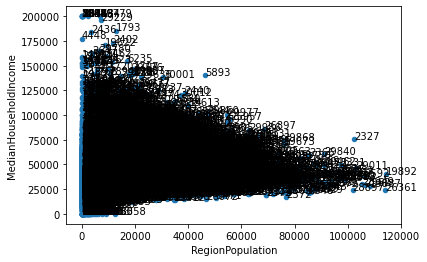

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
merged.plot('RegionPopulation', 'MedianHouseholdIncome', kind='scatter', ax=ax)
for k, v in merged[['RegionPopulation', 'MedianHouseholdIncome']].iterrows():
   ax.annotate(k, v)